# 전처리

In [1]:
import pandas as pd
import re
from datetime import datetime

# path = r'E:\Git Clone\개인 프로젝트\KBS_TEFN\반도체시장_전처리\1_pre_반도체시장_아시아경제.json"

data = pd.read_csv("hanwha.csv", index_col=None)
# data = pd.read_json(path, index_col=None)
data

,content,date,media,title,url
0,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
1,[이데일리 정수영 기자] 을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력...,2015.01.01. 오후 5:13,이데일리,연초부터 건설업계 '칼바람'..새해도 악재 '산 넘어 산',https://news.naver.com/main/read.nhn?mode=LSD&...
2,■ 정부 긴급구호대 1명 에볼라 노출 가능성…독일 후송 시에라리온에 파견된 우...,2015.01.02. 오후 8:00,연합뉴스,<연합뉴스 이 시각 헤드라인> - 20:00,https://news.naver.com/main/read.nhn?mode=LSD&...
3,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
4,대졸신입 대리 승진보다 6개월 빨라…3명중 1명 임원으로 입사 (서울=연합뉴스...,2015.01.08. 오전 6:11,연합뉴스,"대기업 총수자녀, 28세 입사해 3.5년 만에 임원 승진",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
73287,[이데일리 배진솔 기자] 전국경제인연합회(전경련)은 23일 전경련 회관에서 지난 8...,2020.09.23. 오전 8:40,이데일리,"전경련, 주한베트남 대사만나 '한-베트남 경제협력 증진방안 논의'",https://news.naver.com/main/read.nhn?mode=LSD&...
73288,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
73289,[이데일리 전선형 이승현 기자] 회사원 김명은씨는 분통이 터졌다. 최근 은행창구를 ...,2020.09.23. 오전 6:02,이데일리,'보험료 카드납부 왜 안되나'‥10년 묵은 쟁점 다시 도마위,https://news.naver.com/main/read.nhn?mode=LSD&...
73290,(서울=연합뉴스) 서미숙 기자 = 국내 주요 재벌그룹의 오너 일가가 대출을 위해 금...,2020.09.23. 오전 5:31,연합뉴스,오너일가 보유주식의 18%는 은행 소유…담보설정 14조8천억원,https://news.naver.com/main/read.nhn?mode=LSD&...


In [2]:
df = data.dropna()

# df = df.drop_duplicates(['date'])
df["date"] = df.date.str.replace("\. .*", "").str.replace("\.","-")
df["date"] = df.date.astype('datetime64[ns]')
# df = df.set_index("date")
# df = df.sort_index()
df = df.sort_values(by=['date'], axis=0)
df = df.reset_index().drop(["index"], axis=1)
# df

C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [3]:
df["content"] = df["content"].str.replace("\[.+기자\]", "").str.strip()
df["content"] = df["content"].str.replace("[가-힝]{3} \([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\(.+=연합뉴스\).+기자 =", "").str.strip()
df["content"] = df["content"].str.replace("\(연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+=연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+ 연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("[a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\<저작권자.+금지\>", "").str.strip()
df["content"] = df["content"].str.replace("▲", "").str.strip()
df["content"] = df["content"].str.replace("◇", "").str.strip()
df["content"] = df["content"].str.replace("◆", "").str.strip()
df["content"] = df["content"].str.replace("▷", "").str.strip()
df["content"] = df["content"].str.replace("△", "").str.strip()
df["content"] = df["content"].str.replace("\[이데일리.+\]", "").str.strip()
df["content"] = df["content"].str.replace("\[.+특파원\]", "").str.strip()
df["content"] = df["content"].str.replace("■", "").str.strip()
df["content"] = df["content"].str.replace("○", " ").str.strip()
df["content"] = df["content"].str.replace("ⓝ", " ").str.strip()
df["content"] = df["content"].str.replace("<<.+>>", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]{4}\.[0-9]+\.[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("문의는.*홈페이지.*\.", "").str.strip()
df["content"] = df["content"].str.replace("☎", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]+-[0-9]+-[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\(대표이사.+\)", "").str.strip()
df["content"] = df["content"].str.replace("\\'", "").str.strip()
df["content"] = df["content"].str.replace("\'", "").str.strip()
df["content"] = df["content"].str.replace("\"", "").str.strip()
df["content"] = df["content"].str.replace("‘", "").str.strip()
df["content"] = df["content"].str.replace("’", "").str.strip()
df["content"] = df["content"].str.replace("“", "").str.strip()
df["content"] = df["content"].str.replace("”", "").str.strip()
df["content"] = df["content"].str.replace("=", " ").str.strip()
df["content"] = df["content"].str.replace("--", " ").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com\/[a-zA-Z0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("추가 정보:", " ").str.strip()
df["content"] = df["content"].str.replace("자료 제공:", " ").str.strip()
df["content"] = df["content"].str.replace("\[.+금지\]", "").str.strip()
df["content"] = df["content"].str.replace("\(\)", "").str.strip()
df["content"] = df["content"].str.replace("[ ]+", " ").str.strip()

In [4]:
documents = df.content.values.tolist()
# documents

In [11]:
# df.iloc[31599].content

df.content[0]

In [5]:
from konlpy.tag import Mecab
mecab = Mecab()

tokenized_docs = df['content'].apply(lambda x: mecab.nouns(x))
tokenized_docs = tokenized_docs.apply(lambda x: [item for item in x if len(item)>1])
tokenized_docs

0        [미년, 새해, 초부, 건설업, 칼바람, 시공, 능력, 평가, 순위, 동부건설, 결...
1        [중화학, 업계, 다사다난, 사고, 안전, 관리, 문제, 도마, 글로벌, 경기, 침...
2        [상반기, 기준, 금리, 추가, 하락, 초저, 금리, 기조, 은행, 만기, 정기예금...
3        [조직, 정비, 전자, 업계, 올해, 안정, 성장, 다지기, 주력, 삼성전자, 스마...
4        [지역, 단장, 동부, 광진, 나주호, 충북, 송정섭, 충남, 임장혁, 무등, 박희...
                               ...                        
34942    [대표, 이사, 내정, 한화, 글로벌, 부문, 김맹윤, 방산, 부문, 김승모, 한화...
34943    [흥국, 증권, 한화, 솔루션, 미국, 수소, 업체, 니콜라, 이슈, 주가, 반영,...
34944    [한화그룹, 한화, 솔루션, 전략, 부문, 김동관, 부사장, 사진, 사장, 승진, ...
34945    [한화그룹, 장단, 인사, 김승연, 한화그룹, 회장, 장남, 김동관, 한화, 솔루션...
34946    [한화그룹, 계열사, 장단, 인사, 단행, 왼쪽, 한화, 글로벌, 부문, 김맹윤, ...
Name: content, Length: 34947, dtype: object

In [13]:
tokenized_docs[0]

# LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel, TfidfModel

id2word = corpora.Dictionary(tokenized_docs)
corpus_TDM = [id2word.doc2bow(doc) for doc in tokenized_docs]
tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 100
lda = LdaModel(corpus=corpus_TFIDF, id2word=id2word, num_topics=n, random_state=100)

In [13]:
lda.print_topics(100)

[(0,
  &#39;0.032*&quot;모델&quot; + 0.031*&quot;모듈&quot; + 0.030*&quot;장비&quot; + 0.026*&quot;연료전지&quot; + 0.026*&quot;성능&quot; + 0.025*&quot;탄소&quot; + 0.024*&quot;전기&quot; + 0.021*&quot;양산&quot; + 0.021*&quot;소재&quot; + 0.019*&quot;배터리&quot;&#39;),
 (1,
  &#39;0.009*&quot;달러&quot; + 0.006*&quot;중국&quot; + 0.006*&quot;데일리&quot; + 0.006*&quot;미국&quot; + 0.006*&quot;사고&quot; + 0.006*&quot;금융&quot; + 0.006*&quot;기업&quot; + 0.005*&quot;정부&quot; + 0.005*&quot;확산&quot; + 0.005*&quot;발생&quot;&#39;),
 (2,
  &#39;0.000*&quot;글래스고&quot; + 0.000*&quot;멜레&quot; + 0.000*&quot;화악&quot; + 0.000*&quot;드완&quot; + 0.000*&quot;묘회&quot; + 0.000*&quot;피사&quot; + 0.000*&quot;산타마리아&quot; + 0.000*&quot;파산법&quot; + 0.000*&quot;사민&quot; + 0.000*&quot;푯값&quot;&#39;),
 (3,
  &#39;0.037*&quot;유동&quot; + 0.034*&quot;유로&quot; + 0.028*&quot;밸류&quot; + 0.024*&quot;컨퍼런스&quot; + 0.023*&quot;레버리지&quot; + 0.014*&quot;셰프&quot; + 0.013*&quot;의류&quot; + 0.011*&quot;음식&quot; + 0.011*&quot;경신&quot; + 0.009*&quot;한중&quot;&#39;)

In [27]:
# # Mecab 토큰화
# from konlpy.tag import Mecab
# mecab = Mecab()

# data_word=[]
# for i in range(len(documents)):
#     data_word.append(mecab.nouns(documents[i]))

# data_word

# MalletLDA

## 첫번째 방법

In [6]:
import warnings
warnings.filterwarnings("ignore")

import os
from gensim import corpora
from gensim.models.wrappers import LdaMallet

id2word=corpora.Dictionary(tokenized_docs)
id2word.filter_extremes(no_below = 20) #20회 이하로 등장한 단어는 삭제
texts = tokenized_docs
corpus=[id2word.doc2bow(text) for text in texts]

os.environ['Mallet_HOME'] = 'C:\\Mallet'
mallet_path = 'C:\\Mallet\\bin\\mallet' 
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=100, id2word=id2word)

In [7]:
ldamallet.print_topics(100)

[(0,
  '0.084*"직원" + 0.049*"시간" + 0.030*"임직원" + 0.030*"근무" + 0.024*"업무" + 0.023*"회사" + 0.022*"도입" + 0.021*"시행" + 0.020*"인력" + 0.020*"제도"'),
 (1,
  '0.097*"공시" + 0.031*"결정" + 0.029*"규모" + 0.020*"계약" + 0.016*"취득" + 0.013*"변경" + 0.012*"증자" + 0.012*"주식" + 0.010*"유상" + 0.009*"발행"'),
 (2,
  '0.088*"북한" + 0.023*"지원" + 0.021*"대북" + 0.021*"제재" + 0.016*"유엔" + 0.015*"정상" + 0.014*"남북" + 0.014*"회담" + 0.012*"국제" + 0.011*"한반도"'),
 (3,
  '0.182*"그룹" + 0.084*"현대" + 0.055*"롯데" + 0.040*"계열사" + 0.039*"두산" + 0.034*"중공업" + 0.030*"현대차" + 0.027*"포스코" + 0.024*"삼성" + 0.021*"한진"'),
 (4,
  '0.092*"자동차" + 0.035*"차량" + 0.034*"판매" + 0.027*"국내" + 0.026*"배터리" + 0.025*"전기차" + 0.023*"전기" + 0.022*"업체" + 0.021*"현대차" + 0.019*"생산"'),
 (5,
  '0.078*"행사" + 0.047*"불꽃" + 0.037*"축제" + 0.028*"참가" + 0.025*"세계" + 0.020*"개최" + 0.019*"서울" + 0.016*"진행" + 0.016*"올해" + 0.015*"전시회"'),
 (6,
  '0.117*"영업" + 0.067*"이익" + 0.066*"증가" + 0.065*"대비" + 0.065*"전년" + 0.055*"분기" + 0.049*"매출액" + 0.045*"감소" + 0.036*"동기" + 0.033*"연결"'),
 (7,
  '0.075*"

In [12]:
ldamallet.show_topic(0)

[('안전', 0.0763703594764376),
 ('사고', 0.053343698132235225),
 ('폭발', 0.02918251150282581),
 ('관리', 0.027501733302519066),
 ('발생', 0.026514276109838857),
 ('공장', 0.024938546547051285),
 ('작업', 0.02315271970922537),
 ('대전', 0.022816564069164023),
 ('근로자', 0.019181881211000694),
 ('업체', 0.018971783935962352)]

## 두번째 방법

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
 
    return model_list, coherence_values

In [11]:
import os
from gensim import corpora
from gensim.utils import simple_preprocess

id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20) #20회 이하로 등장한 단어는 삭제
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

os.environ['Mallet_HOME'] = 'C:\\Mallet'
mallet_path = 'C:\\Mallet\\bin\\mallet' 

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=100, step=11)

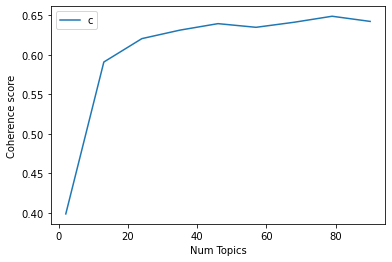

In [12]:
import matplotlib.pyplot as plt

limit=100; start=2; step=11;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3987
Num Topics = 13  has Coherence Value of 0.5908
Num Topics = 24  has Coherence Value of 0.6204
Num Topics = 35  has Coherence Value of 0.6312
Num Topics = 46  has Coherence Value of 0.6394
Num Topics = 57  has Coherence Value of 0.6347
Num Topics = 68  has Coherence Value of 0.6411
Num Topics = 79  has Coherence Value of 0.6487
Num Topics = 90  has Coherence Value of 0.6422


# Mallet LDA 데이터프레임

In [9]:
import pandas as pd

trading_volume_df = pd.read_csv("trading_volume.csv", index_col = "날짜", parse_dates=True)
trading_volume_df = trading_volume_df.sort_index() # 정렬 sort_values()
trading_volume_df

,거래량
날짜,
2015-01-02,158193
2015-01-05,214547
2015-01-06,182253
2015-01-07,118159
2015-01-08,156524
...,...
2020-09-23,592482
2020-09-24,467569
2020-09-25,330340


In [10]:
def Text_Topic_Count(malletldamodel=ldamallet, topic_num = 0, date = df['date'], texts=texts, documents=documents):
    
    topic_words_list = malletldamodel.show_topic(topic_num, )
    topic_keywords = [word for word, prop in topic_words_list]
    
    text_topic_count = []
    for text in texts:
        sum_topic = 0
        for keyword in topic_keywords:
            sum_topic += text.count(keyword)
        text_topic_count.append(sum_topic)
    
    topic_count_df = pd.DataFrame({'Date': date, 'Documents': documents, 'Topic_Count':text_topic_count})
    
    topic_count_grpd = topic_count_df.groupby('Date')
    Date_count_grpd_df = pd.DataFrame(topic_count_grpd.sum()['Topic_Count'])
    
    count = 0
    for topic_count in Date_count_grpd_df.Topic_Count:
        if topic_count != 0:
            count += 1
            
    describing_stock_market = ['주식', '시장', '금융', '주가']
    
    for describing_word in describing_stock_market:
        if describing_word in topic_keywords or count < 80:
            print('Not useful Topic', end=' ')
            return topic_count_df, Date_count_grpd_df
    print('Useful Topic', end = ' ')
    
    merge_df = pd.merge(trading_volume_df, Date_count_grpd_df, left_index=True, right_index=True, how='inner')
    corr = merge_df.corr()
    print('{}%'.format(round(corr['Topic_Count'][0]*100, 2)), end='')
    
    return topic_count_df, Date_count_grpd_df

In [11]:
for i in range(100):
    print(i, end=' ')
    text_topic_count, Date_count_grpd = Text_Topic_Count(malletldamodel=ldamallet, topic_num = i, date = df['date'], texts=texts, documents=documents)
    print()

0 Useful Topic 2.34%
1 Not useful Topic 
2 Useful Topic 2.34%
3 Useful Topic -2.9%
4 Useful Topic 3.9%
5 Useful Topic -3.72%
6 Useful Topic 3.13%
7 Useful Topic 0.3%
8 Useful Topic 16.6%
9 Useful Topic -3.67%
10 Useful Topic -2.02%
11 Useful Topic 2.24%
12 Useful Topic 5.33%
13 Useful Topic -0.8%
14 Useful Topic -0.78%
15 Useful Topic 3.3%
16 Useful Topic -2.72%
17 Useful Topic -0.05%
18 Not useful Topic 
19 Useful Topic -3.04%
20 Useful Topic 0.69%
21 Useful Topic 1.77%
22 Useful Topic 1.65%
23 Useful Topic 0.27%
24 Useful Topic 3.93%
25 Useful Topic -1.88%
26 Useful Topic 2.07%
27 Useful Topic 5.12%
28 Useful Topic -1.92%
29 Not useful Topic 
30 Useful Topic 0.42%
31 Useful Topic -0.7%
32 Useful Topic 1.96%
33 Useful Topic -5.21%
34 Useful Topic -1.73%
35 Useful Topic 3.87%
36 Useful Topic -0.77%
37 Useful Topic -0.16%
38 Useful Topic 0.67%
39 Useful Topic -0.57%
40 Not useful Topic 
41 Useful Topic 11.13%
42 Useful Topic -2.49%
43 Useful Topic 4.36%
44 Useful Topic 21.18%
45 Useful 

In [54]:
ldamallet.show_topic(41)

[('바이오', 0.0595773108223005),
 ('제약', 0.03075023280294749),
 ('개발', 0.027976841167658608),
 ('트리', 0.02137738369974493),
 ('의약품', 0.02079031539738451),
 ('헬스', 0.020223490829588242),
 ('케어', 0.019737641200048586),
 ('의료', 0.01724766184865784),
 ('임상', 0.01724766184865784),
 ('치료제', 0.01690351836106725)]

In [119]:
def Text_Topic_Count(malletldamodel=ldamallet, topic_num = 1, date = df['date'], texts=texts, documents=documents):
    
    topic_words_list = malletldamodel.show_topic(topic_num, )
    topic_keywords = [word for word, prop in topic_words_list]
    
    text_topic_count = []
    for text in texts:
        sum_topic = 0
        for keyword in topic_keywords:
            sum_topic += text.count(keyword)
        text_topic_count.append(sum_topic)
    
    topic_count_df = pd.DataFrame({'Date': date, 'Documents': documents, 'Topic_Count':text_topic_count})
    
    topic_count_grpd = topic_count_df.groupby('Date')
    Date_count_grpd_df = pd.DataFrame(topic_count_grpd.sum()['Topic_Count'])
    
    return topic_count_df, Date_count_grpd_df

In [55]:
text_topic_count, Date_count_grpd = Text_Topic_Count(malletldamodel=ldamallet, topic_num = 41, date = df['date'], texts=texts, documents=documents)

Useful Topic 11.13%

In [56]:
text_topic_count

,Date,Documents,Topic_Count
0,2015-01-01,을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력평가 순위 25위인 동부건...,1
1,2015-01-01,중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. 올초부터 잇단 사고 등으로...,2
2,2015-01-01,상반기 기준금리 인하시 추가하락 불가피 초저금리 기조로 은행권 1년 만기 정기예금 ...,0
3,2015-01-01,새롭게 조직을 정비한 전자업계는 올해 안정 속 성장으로 내실 다지기에 주력할 것으로...,2
4,2015-01-01,지역단장 동부광진 나주호 충북 송정섭 충남 임장혁 무등 박희창 포항 박완철,0
...,...,...,...
34942,2020-09-28,대표이사 내정㈜한화(000880) 글로벌부문 김맹윤 방산부문 김승모 한화정밀기계 옥...,0
34943,2020-09-28,흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업체 니콜라 이슈가 주가에 ...,0
34944,2020-09-28,한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사장으로 승진시키며 신임 대...,0
34945,2020-09-28,28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김동관 한화솔루션 전...,0


In [57]:
Date_count_grpd

,Topic_Count
Date,
2015-01-01,7
2015-01-02,45
2015-01-03,1
2015-01-04,14
2015-01-05,2
...,...
2020-09-24,10
2020-09-25,10
2020-09-26,2


# 시각화

In [58]:
from matplotlib import font_manager as fm,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)

In [59]:
news_date = Date_count_grpd.loc['2015-01-01':'2020-09-28'].index
topic_count = Date_count_grpd.loc['2015-01-01':'2020-09-28']['Topic_Count']
trade_date = trading_volume_df.loc['2015-01-01':'2020-09-28'].index
stock = trading_volume_df.loc['2015-01-01':'2020-09-28']['거래량']

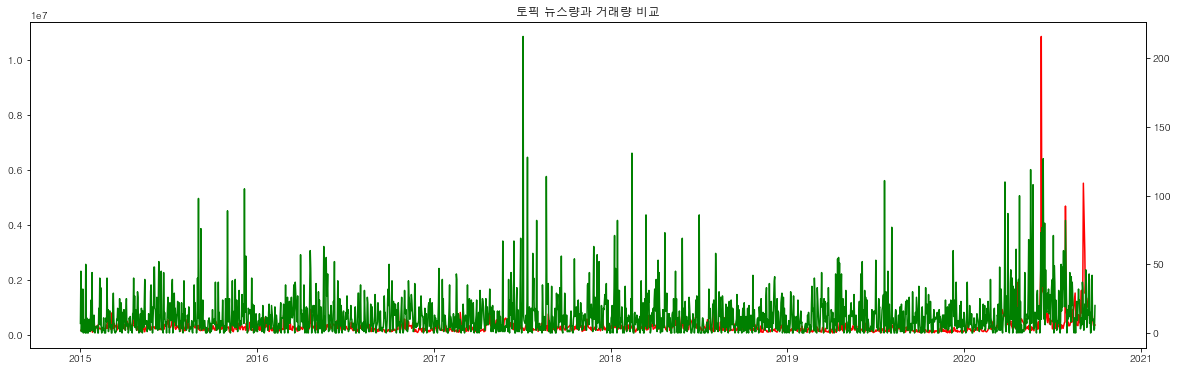

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(20,6))
ax1 = ax0.twinx()

ax0.plot_date(trade_date, stock, '-', color='r')
ax1.plot_date(news_date, topic_count, '-', color='g')
plt.title('토픽 뉴스량과 거래량 비교') 
plt.show()

In [61]:
news_date = Date_count_grpd.loc['2020-01-01':'2020-09-28'].index
topic_count = Date_count_grpd.loc['2020-01-01':'2020-09-28']['Topic_Count']
trade_date = trading_volume_df.loc['2020-01-01':'2020-09-28'].index
stock = trading_volume_df.loc['2020-01-01':'2020-09-28']['거래량']

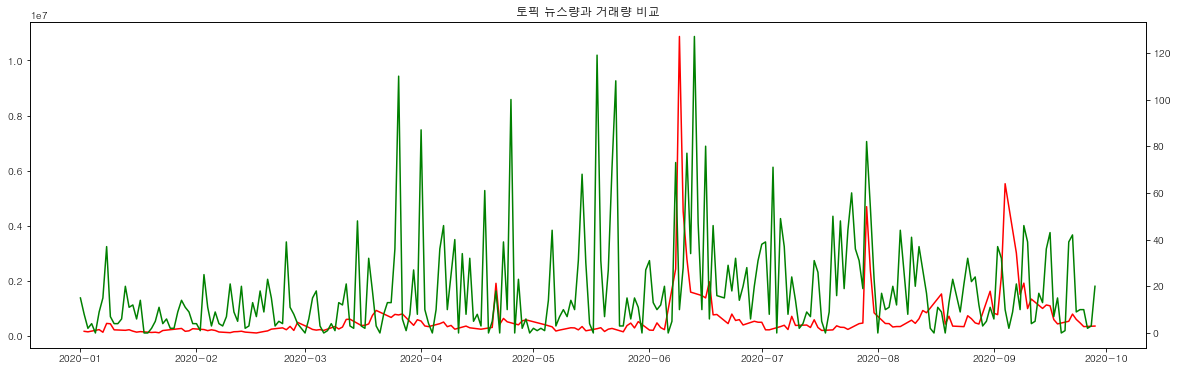

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(20,6))
ax1 = ax0.twinx()

ax0.plot_date(trade_date, stock, '-', color='r')
ax1.plot_date(news_date, topic_count, '-', color='g')
plt.title('토픽 뉴스량과 거래량 비교') 
plt.show()